In [48]:
import MAVI
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import importlib as imp
imp.reload(MAVI)

<module 'MAVI' from '/gpfs/data/rsingh47/anair27/singh-lab-TCGA-project/multiomic-model-tcga/models/MAVI/MAVI.py'>

In [5]:
CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"
CNV = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_cnv_data.csv"
EPIGENOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_epigenomic_data.csv"
TRANSCRIPTOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_transcriptomic_data.csv"

In [6]:
clinical_df = pd.read_csv(CLINICAL)
transcriptomic_df = pd.read_csv(TRANSCRIPTOMIC)


In [7]:
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]

In [8]:
data = transcriptomic_df.merge(diagnosis, on = "case_id").drop_duplicates()
data.head()

,Unnamed: 0,case_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,vital_status_Dead
0,0,TCGA-35-4122,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,...,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877,0
1,0,TCGA-75-6203,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,...,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131,0
2,0,TCGA-75-5146,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988,0
3,0,TCGA-78-8648,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,...,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448,1
4,0,TCGA-55-A4DG,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,...,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391,0


In [11]:
train_df, test_df = train_test_split(data.iloc[:,2:].dropna(), test_size=0.05, random_state=42)

In [12]:
x_train = normalize(train_df.drop('vital_status_Dead', axis = 1))
x_test = normalize(test_df.drop('vital_status_Dead', axis = 1))
y_train = train_df['vital_status_Dead']
y_test = test_df['vital_status_Dead']

In [50]:
my_vae = MAVI.VAE(input_dim = x_train.shape[1], activation = 'relu')

In [51]:
my_vae.train(x_train)

Train on 440 samples, validate on 49 samples
Epoch 1/10


/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


440/440 - 4s - loss: 0.0667 - KL_loss: 8.4934e-04 - recon_loss: 0.0654 - val_loss: 0.0463 - val_KL_loss: 4.5615e-04 - val_recon_loss: 0.0422 - 4s/epoch - 10ms/sample
Epoch 2/10
440/440 - 2s - loss: 0.0449 - KL_loss: 3.3244e-04 - recon_loss: 0.0443 - val_loss: 0.0302 - val_KL_loss: 1.9929e-04 - val_recon_loss: 0.0270 - 2s/epoch - 5ms/sample
Epoch 3/10
440/440 - 2s - loss: 0.0320 - KL_loss: 1.6782e-04 - recon_loss: 0.0316 - val_loss: 0.0223 - val_KL_loss: 1.3968e-04 - val_recon_loss: 0.0207 - 2s/epoch - 5ms/sample
Epoch 4/10
440/440 - 2s - loss: 0.0242 - KL_loss: 1.1973e-04 - recon_loss: 0.0240 - val_loss: 0.0175 - val_KL_loss: 1.0474e-04 - val_recon_loss: 0.0161 - 2s/epoch - 5ms/sample
Epoch 5/10
440/440 - 2s - loss: 0.0197 - KL_loss: 9.0526e-05 - recon_loss: 0.0195 - val_loss: 0.0161 - val_KL_loss: 8.6321e-05 - val_recon_loss: 0.0146 - 2s/epoch - 5ms/sample
Epoch 6/10
440/440 - 2s - loss: 0.0168 - KL_loss: 7.3379e-05 - recon_loss: 0.0167 - val_loss: 0.0130 - val_KL_loss: 7.4156e-05 - v

/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


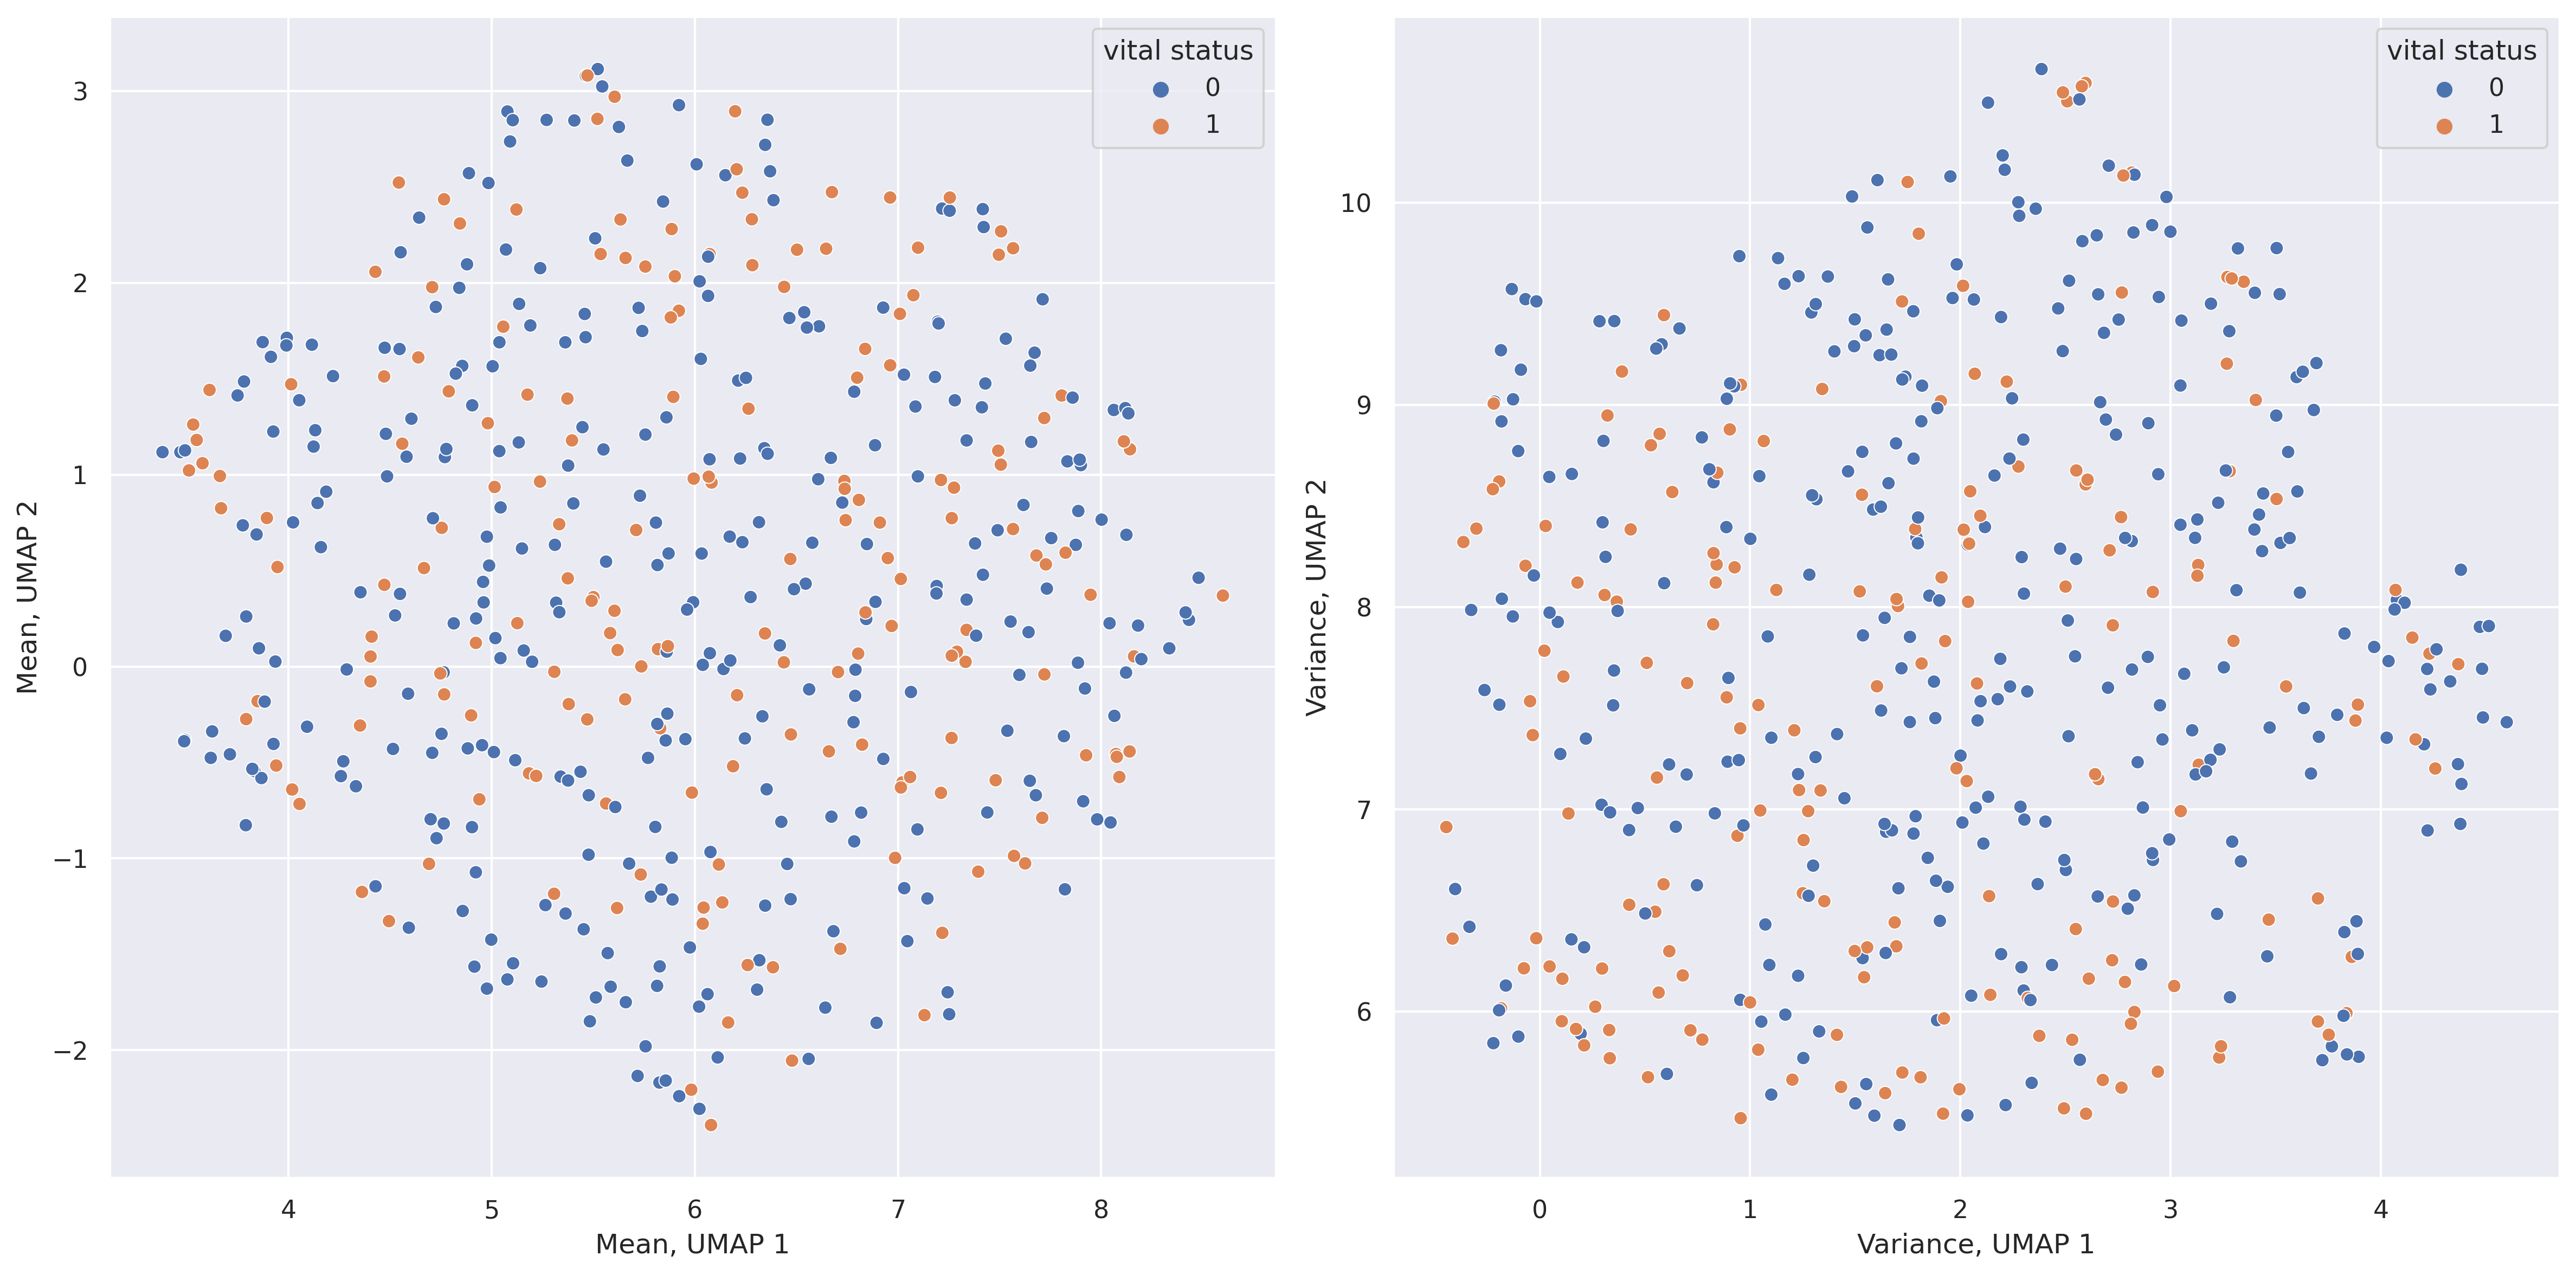

In [32]:
my_vae.plot_latent_space(x_train, y_train, output=None)

In [53]:
x_train_embedding = my_vae.get_embedding(x_train)

In [60]:
import unimodal_model as um
imp.reload(um)

<module 'unimodal_model' from '/gpfs/data/rsingh47/anair27/singh-lab-TCGA-project/multiomic-model-tcga/models/MAVI/unimodal_model.py'>

In [61]:
model, history = um.create_model(x_train_embedding, y_train)

Train on 440 samples, validate on 49 samples
Epoch 1/50
 32/440 [=>............................] - ETA: 9s - loss: 0.9660 - accuracy: 0.5312

/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


440/440 [==============================] - 2s 5ms/sample - loss: 0.7851 - accuracy: 0.5364 - val_loss: 0.6739 - val_accuracy: 0.6327
Epoch 2/50
440/440 [==============================] - 0s 62us/sample - loss: 0.6801 - accuracy: 0.5955 - val_loss: 0.6684 - val_accuracy: 0.6327
Epoch 3/50
440/440 [==============================] - 0s 62us/sample - loss: 0.6597 - accuracy: 0.6136 - val_loss: 0.6632 - val_accuracy: 0.6327
Epoch 4/50
440/440 [==============================] - 0s 63us/sample - loss: 0.6428 - accuracy: 0.6386 - val_loss: 0.6615 - val_accuracy: 0.6327
Epoch 5/50
440/440 [==============================] - 0s 64us/sample - loss: 0.6243 - accuracy: 0.6364 - val_loss: 0.6597 - val_accuracy: 0.6327
Epoch 6/50
440/440 [==============================] - 0s 64us/sample - loss: 0.6083 - accuracy: 0.6682 - val_loss: 0.6587 - val_accuracy: 0.6327
Epoch 7/50
440/440 [==============================] - 0s 62us/sample - loss: 0.5913 - accuracy: 0.6909 - val_loss: 0.6583 - val_accuracy: 0.63

Test loss: 0.9410820007324219 / Test accuracy: 0.5769230723381042


/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


AttributeError: 'NoneType' object has no attribute 'write'

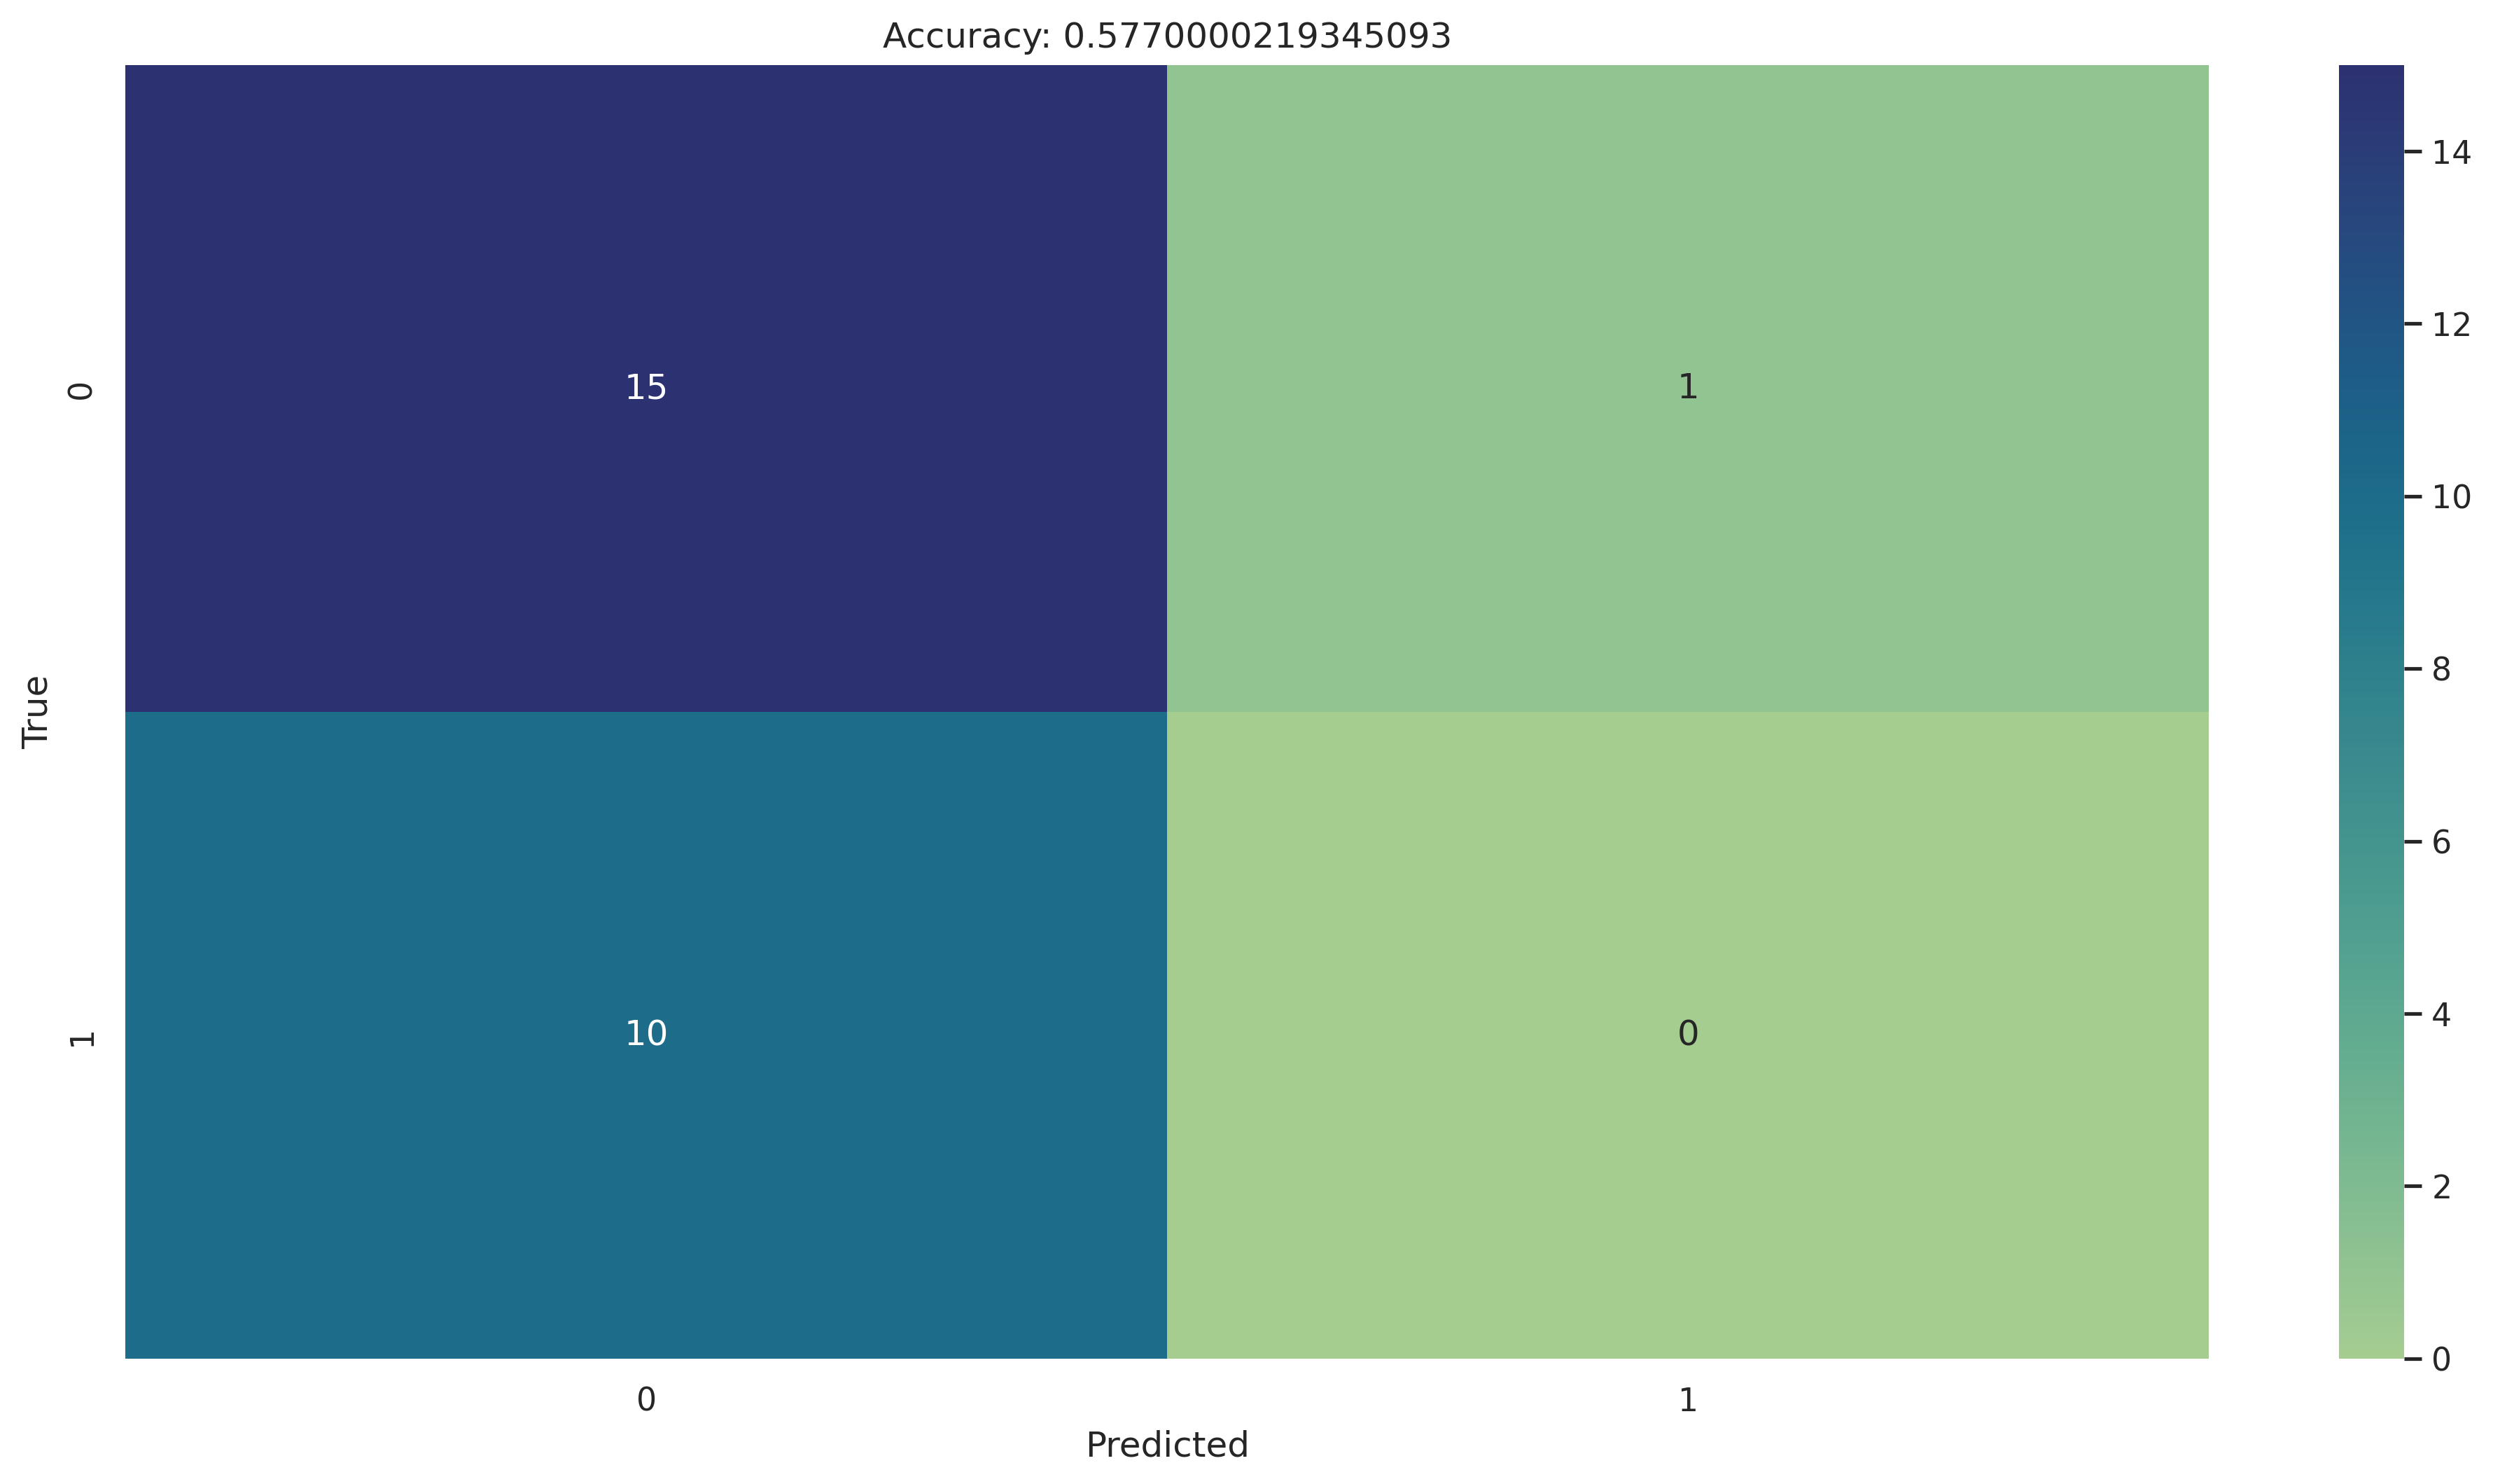

In [64]:
um.plot_confusion(model, my_vae.get_embedding(x_test), y_test, None)

In [47]:
my_vae.encoder.predict(x_train)[0]

array([[ 3.7200458e-04, -7.0176128e-04, -1.0281039e-04, ...,
         1.0002836e-03, -4.3575218e-04, -2.7512520e-04],
       [ 9.6348918e-04,  4.5435579e-04,  2.2083189e-04, ...,
         4.3962614e-04,  4.8705694e-04,  3.2583042e-03],
       [-1.0094248e-03,  3.0643243e-04,  9.4588246e-04, ...,
        -1.4872688e-03, -2.2696293e-04, -1.7838302e-04],
       ...,
       [-1.2301386e-04, -8.3154888e-04, -9.6880831e-04, ...,
         5.0070242e-04, -1.5181262e-03, -4.6019995e-04],
       [ 8.2682795e-04, -4.0486484e-04, -1.1959912e-03, ...,
        -2.0920756e-04,  3.4897865e-03,  5.4377568e-04],
       [ 1.6678883e-03,  8.4058847e-06,  8.1826124e-04, ...,
         2.7145588e-04, -7.8900444e-04,  1.9682250e-03]], dtype=float32)

In [155]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from tensorflow.keras.models import Model
from keras import backend as K
from sklearn.preprocessing import normalize
import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [156]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [157]:
CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"
CNV = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_cnv_data.csv"
EPIGENOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_epigenomic_data.csv"
TRANSCRIPTOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_transcriptomic_data.csv"

In [158]:
clinical_df = pd.read_csv(CLINICAL)
transcriptomic_df = pd.read_csv(TRANSCRIPTOMIC)

In [159]:
transcriptomic_df.head()

,Unnamed: 0,case_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,0,TCGA-35-4122,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,...,0.0,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877
1,0,TCGA-75-6203,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,...,0.0,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131
2,0,TCGA-75-5146,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988
3,0,TCGA-78-8648,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,...,0.0,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448
4,0,TCGA-55-A4DG,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,...,0.0,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391


In [160]:
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]

In [161]:
data = transcriptomic_df.merge(diagnosis, on = "case_id").drop_duplicates()
data.head()

,Unnamed: 0,case_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,vital_status_Dead
0,0,TCGA-35-4122,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,...,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877,0
1,0,TCGA-75-6203,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,...,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131,0
2,0,TCGA-75-5146,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988,0
3,0,TCGA-78-8648,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,...,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448,1
4,0,TCGA-55-A4DG,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,...,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391,0


----

In [162]:
tf.keras.backend.clear_session()

In [163]:
train_df, test_df = train_test_split(data.iloc[:,2:].dropna(), test_size=0.05, random_state=42)

In [164]:
x_train = normalize(train_df.drop('vital_status_Dead', axis = 1))
x_test = normalize(test_df.drop('vital_status_Dead', axis = 1))
y_train = train_df['vital_status_Dead']
y_test = test_df['vital_status_Dead']

In [229]:
latent_dim = 16

In [230]:
input_layer = Input(shape = (x_train.shape[1],), name = 'encoder_input')
x = Dense(512, activation = 'tanh', name = 'hidden_layer_1')(input_layer)
# x = Dense(latent_dim, activation = 'sigmoid', name = 'latent_dimension')(x)

In [231]:
z_mean = Dense(latent_dim, name = 'latent_mean')(x)
z_var = Dense(latent_dim, name = 'latent_log_var')(x)

In [232]:
def sample_z(args):
    z_mean, z_var = args
    eps = K.random_normal(shape=(K.shape(z_mean)[0], K.int_shape(z_mean)[1]))
    return z_mean + K.exp(z_var / 2) * eps

In [233]:
z = Lambda(sample_z, output_shape=(latent_dim, ), name='z')([z_mean, z_var])

In [234]:
# encoder = Model(input_layer, [z_mean, z_var, z], name = 'encoder')
# encoder.summary()

In [235]:
# new possibly more concise code
decoder_hidden = Dense(512, activation = 'tanh', name = 'hidden_layer_2')(z)
reconstructed_input = Dense(x_train.shape[1], activation = None, name = 'reconstructed_input')(decoder_hidden)

In [236]:
vae = Model(input_layer, reconstructed_input)

In [237]:
encoder = Model(input_layer, [z_mean, z_var, z], name = 'encoder')

In [238]:
decoder = Model(z, reconstructed_input, name = 'decoder')

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: Tensor("z_3/add:0", shape=(None, 16), dtype=float32)


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("encoder_input_3:0", shape=(None, 19962), dtype=float32) at layer "hidden_layer_1". The following previous layers were accessed without issue: []

In [207]:
# decoder_input = Dense(shape=(latent_dim,), name = 'decoder_input')(z)
decoder_hidden = Dense(512, activation = 'tanh', name = 'hidden_layer_2')
reconstructed_input = Dense(x_train.shape[1], activation = None, name = 'reconstructed_input')

# decoder_hidden = Dense(decoder_dim, activation=activ)
# decoder_out = Dense(decoder_out_dim, activation='sigmoid')
h_p = decoder_hidden(z)
outputs = reconstructed_input(h_p)

In [208]:
# decoder = Model(decoder_input, reconstructed_input, name = 'decoder')
# decoder.summary()

In [209]:
# z_decoded = decoder(z)

In [211]:
vae = Model(input_layer, outputs)
encoder = Model(input_layer, [z_mean, z_var, z], name = 'encoder')
d_in = Input(shape=(latent_dim,))
d_h = decoder_hidden(d_in)
d_out = reconstructed_input(d_h)
decoder = Model(d_in, d_out, name = 'decoder')

# d_in = Input(shape=(n_z+n_y,))
# d_h = decoder_hidden(d_in)
# d_out = decoder_out(d_h)
# decoder = Model(d_in, d_out)

In [217]:
def vae_loss(y_true, y_pred):
    recon = K.sum(keras.metrics.mean_squared_error(y_true, y_pred), axis=-1)
    kl = 0.5 * K.sum(K.exp(z_var) + K.square(z_mean) - 1. - z_var, axis=-1)
    return recon + kl

def KL_loss(y_true, y_pred):
    return(0.5 * K.sum(K.exp(z_var) + K.square(z_mean) - 1. - z_var, axis=1))

def recon_loss(y_true, y_pred):
    return K.sum(keras.metrics.mean_squared_error(y_true, y_pred), axis=-1)

In [218]:
vae.compile(optimizer='adam', loss=vae_loss, metrics = [KL_loss, recon_loss])

In [220]:
history = vae.fit(x_train, x_train, epochs = 10, validation_split=0.1, verbose = 2)

Train on 440 samples, validate on 49 samples
Epoch 1/10
440/440 - 2s - loss: 10.0953 - KL_loss: 1.8915 - recon_loss: 8.0659 - val_loss: 1.1241 - val_KL_loss: 0.8124 - val_recon_loss: 0.2879 - 2s/epoch - 6ms/sample
Epoch 2/10
440/440 - 2s - loss: 0.8189 - KL_loss: 0.6665 - recon_loss: 0.1502 - val_loss: 0.3982 - val_KL_loss: 0.3689 - val_recon_loss: 0.0268 - 2s/epoch - 5ms/sample
Epoch 3/10
440/440 - 2s - loss: 0.2478 - KL_loss: 0.2124 - recon_loss: 0.0352 - val_loss: 0.0757 - val_KL_loss: 0.0572 - val_recon_loss: 0.0169 - 2s/epoch - 5ms/sample
Epoch 4/10
440/440 - 2s - loss: 0.0427 - KL_loss: 0.0256 - recon_loss: 0.0169 - val_loss: 0.0221 - val_KL_loss: 0.0134 - val_recon_loss: 0.0079 - 2s/epoch - 5ms/sample
Epoch 5/10
440/440 - 2s - loss: 0.0201 - KL_loss: 0.0131 - recon_loss: 0.0070 - val_loss: 0.0118 - val_KL_loss: 0.0080 - val_recon_loss: 0.0036 - 2s/epoch - 5ms/sample
Epoch 6/10
440/440 - 2s - loss: 0.0083 - KL_loss: 0.0044 - recon_loss: 0.0039 - val_loss: 0.0043 - val_KL_loss: 0.

In [140]:
class MyLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        
        # Reconstruction loss (as we used sigmoid activation we can use binarycrossentropy)
        recon_loss = keras.metrics.mean_squared_error(x, z_decoded)
        print(recon_loss)
#         recon_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_var - K.square(z_mean) - K.exp(z_var), axis=-1)
#         return recon_loss + kl_loss
        return K.mean(recon_loss + kl_loss)
    def KL_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        return-5e-4 * K.mean(1 + z_var - K.square(z_mean) - K.exp(z_var), axis=-1)

    def recon_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        return keras.metrics.mean_squared_error(x, z_decoded)
    # add custom loss to the class
    def call(self, inputs, training=None):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        if training:
            self.add_metric(keras.metrics.mean_squared_error(x, z_decoded), name='reconstruction_loss')
        self.add_loss(loss, inputs=inputs)
        return x

In [141]:
def recon_loss(x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        return keras.metrics.mean_squared_error(x, z_decoded)

In [142]:
y = MyLayer()([input_layer, z_decoded])

Tensor("my_layer_13/Mean:0", shape=(), dtype=float32)


In [143]:
vae = Model(input_layer, y, name='vae')



In [144]:
# Compile VAE
optimizer = tf.optimizers.Adam(learning_rate=0.01)
vae.compile(optimizer=optimizer, loss=None, metrics = ['reconstruction_loss'])
vae.summary()
# vae.metrics_tensors.append(recon_loss(x, z_decoded))
# vae.metrics_names.append("recon")


ValueError: Unknown metric function: reconstruction_loss. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [133]:
# Train autoencoder
history = vae.fit(x_train, None, epochs = 10, validation_split=0.1, verbose = 2, metrics = ['reconstruction_loss'])

TypeError: Unrecognized keyword arguments: {'metrics': ['reconstruction_loss']}

In [132]:
history.history

{'loss': [1.4970149277360178e-05,
  1.4861136399056043e-05,
  1.4798863214144314e-05,
  1.4916014714055399e-05,
  1.5199113229093861e-05,
  1.5335153511841783e-05,
  1.5484390463494822e-05,
  1.559691670329564e-05,
  1.5615917668169872e-05,
  1.5870199058554134e-05],
 'val_loss': [1.3018884081767673e-05,
  1.280000738841743e-05,
  1.2818457342254245e-05,
  1.3381496779513735e-05,
  1.3408558311775964e-05,
  1.3838984679231154e-05,
  1.3862737544012797e-05,
  1.369259528900682e-05,
  1.4114377113493938e-05,
  1.4309407394036071e-05]}

In [221]:
mu, var, _ = encoder.predict(x_train)

/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [222]:
mu.shape

(489, 16)

In [223]:
reducer = umap.UMAP()

In [224]:

embedding_mean = reducer.fit_transform(mu)
embedding_var = reducer.fit_transform(var)

In [225]:
data = pd.DataFrame({
    'Mean, UMAP 1':embedding_mean[:, 0], 
    'Mean, UMAP 2':embedding_mean[:, 1],
    'Variance, UMAP 1':embedding_var[:, 0], 
    'Variance, UMAP 2':embedding_var[:, 1],
    'vital status':y_train})

In [226]:
data

,"Mean, UMAP 1","Mean, UMAP 2","Variance, UMAP 1","Variance, UMAP 2",vital status
76,9.552356,7.238030,6.279188,5.328520,1
382,11.339381,4.589790,5.220398,10.610883,0
342,8.192977,6.225297,7.992996,8.775874,0
323,8.488870,7.430910,7.886393,10.542497,0
244,7.591179,7.980322,7.940598,9.266205,0
...,...,...,...,...,...
71,10.088207,3.812519,8.437795,6.967316,0
106,8.790025,8.019131,10.740561,9.898736,1
270,9.110867,6.452217,6.994453,9.203711,0
435,6.069623,8.850131,9.974563,9.738087,1


In [227]:
sns.set(rc={'figure.figsize':(16,8), 'figure.dpi': 300})

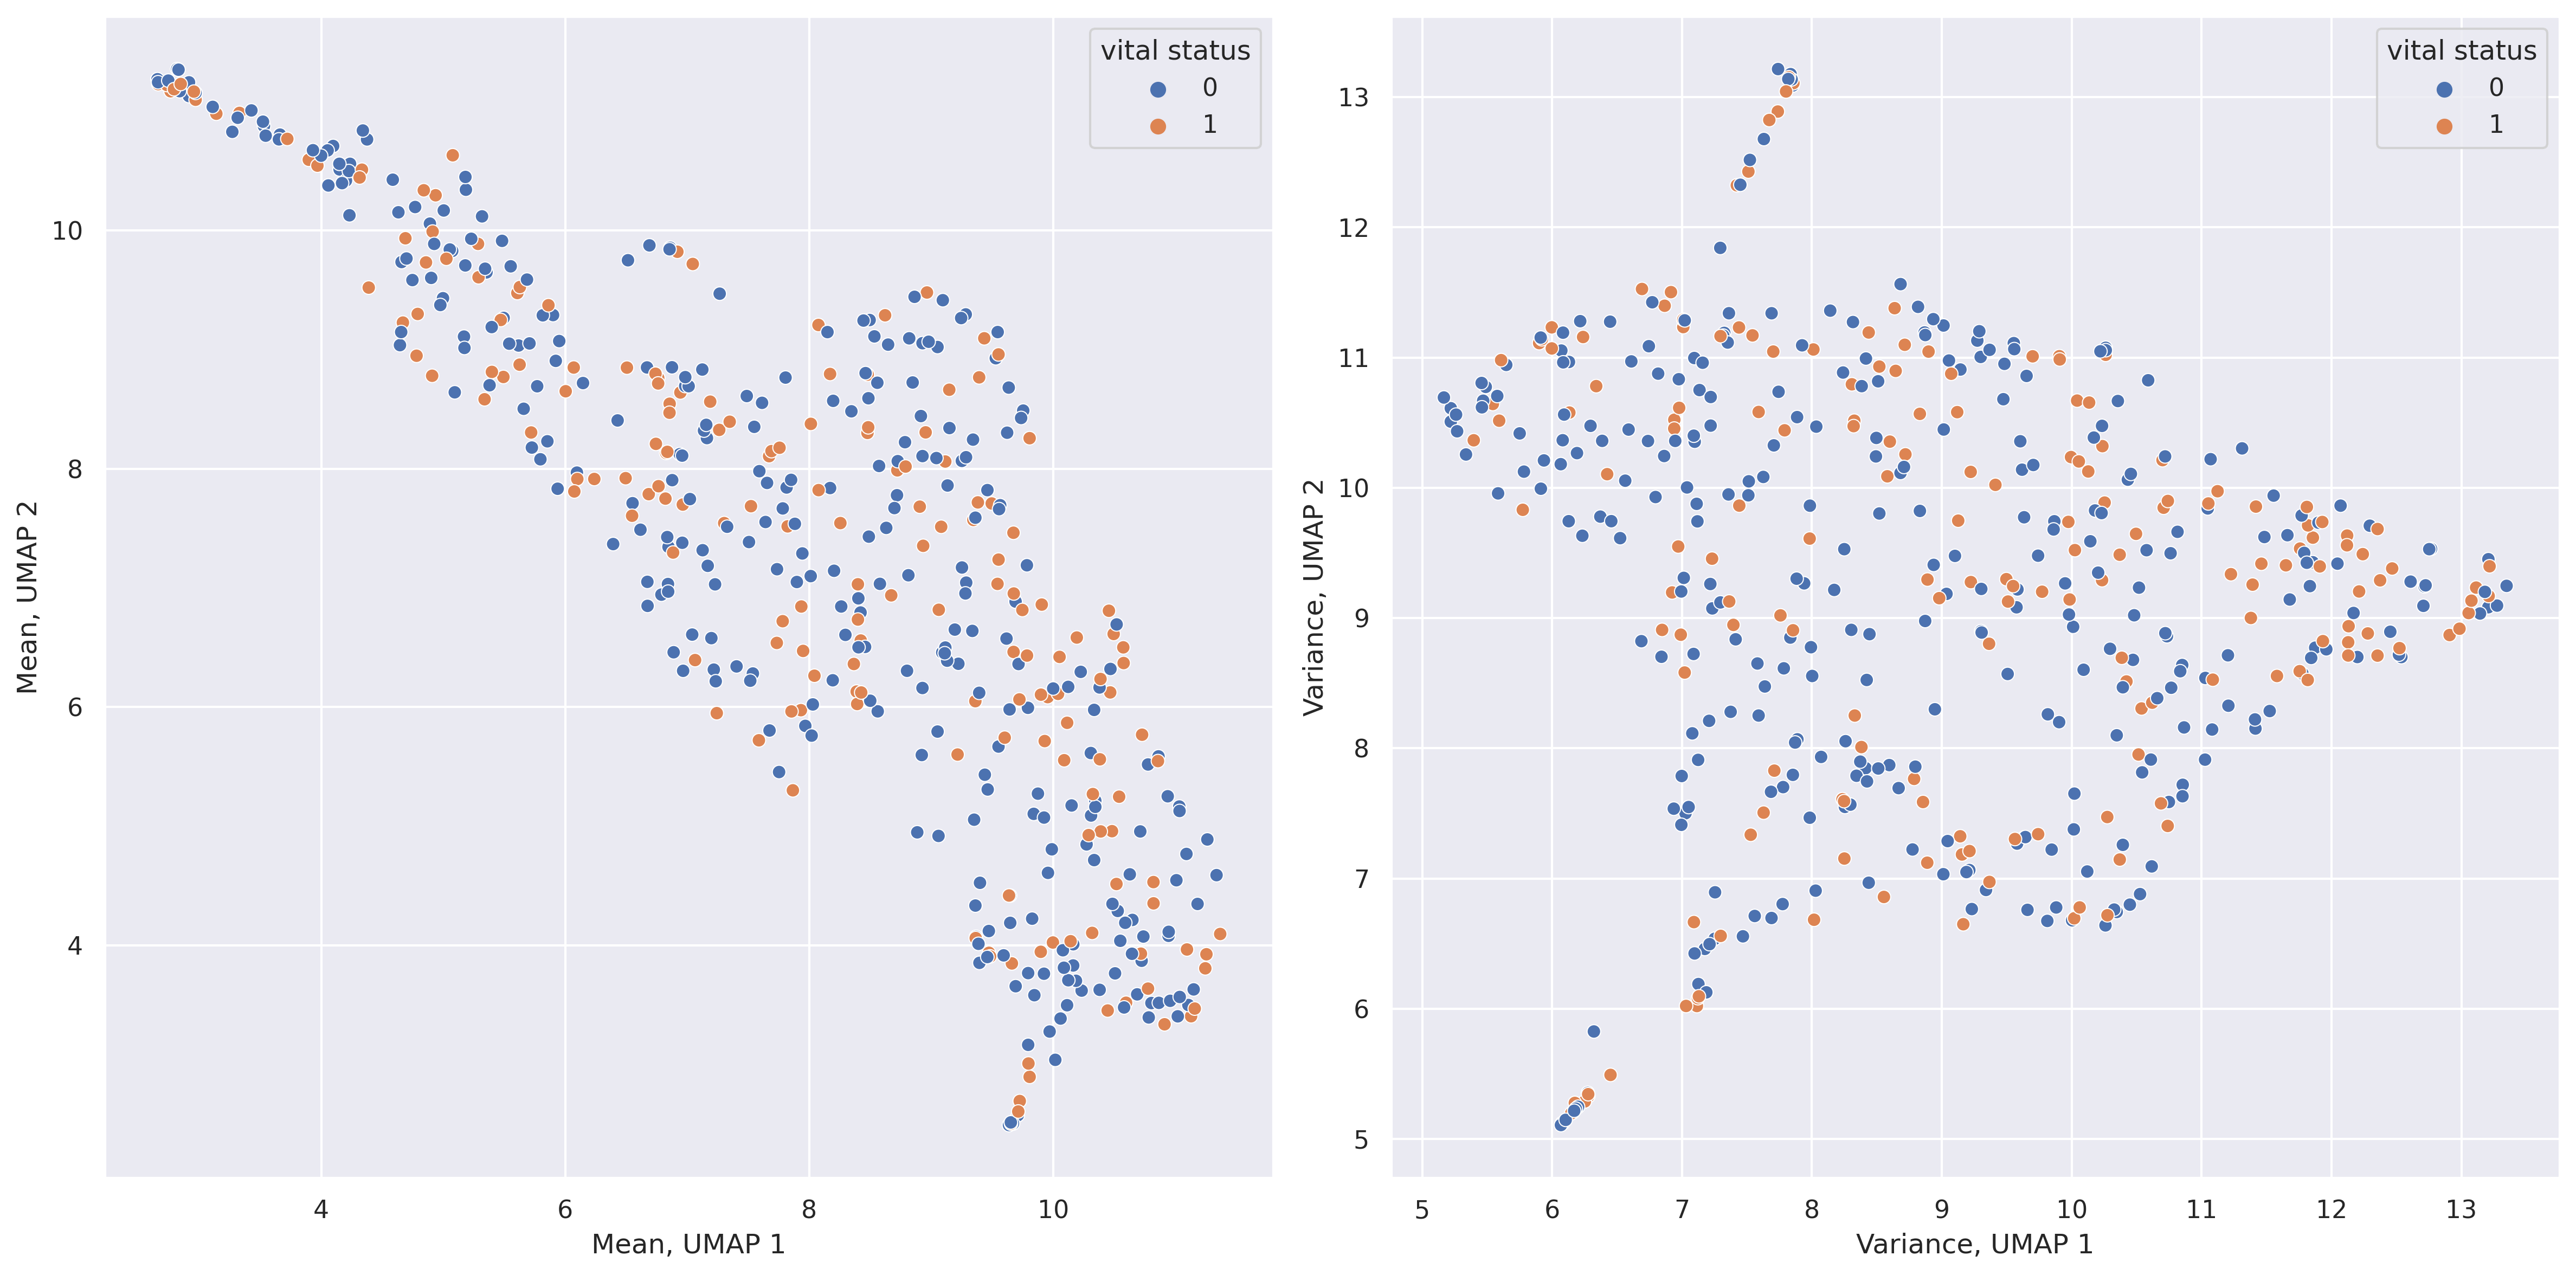

In [228]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.scatterplot(data=data, x = 'Mean, UMAP 1', y = 'Mean, UMAP 2', hue='vital status', ax=ax1)
sns.scatterplot(data=data, x = 'Variance, UMAP 1', y = 'Variance, UMAP 2', hue='vital status', ax=ax2)
fig.tight_layout()

In [77]:
_.shape

(489, 16)

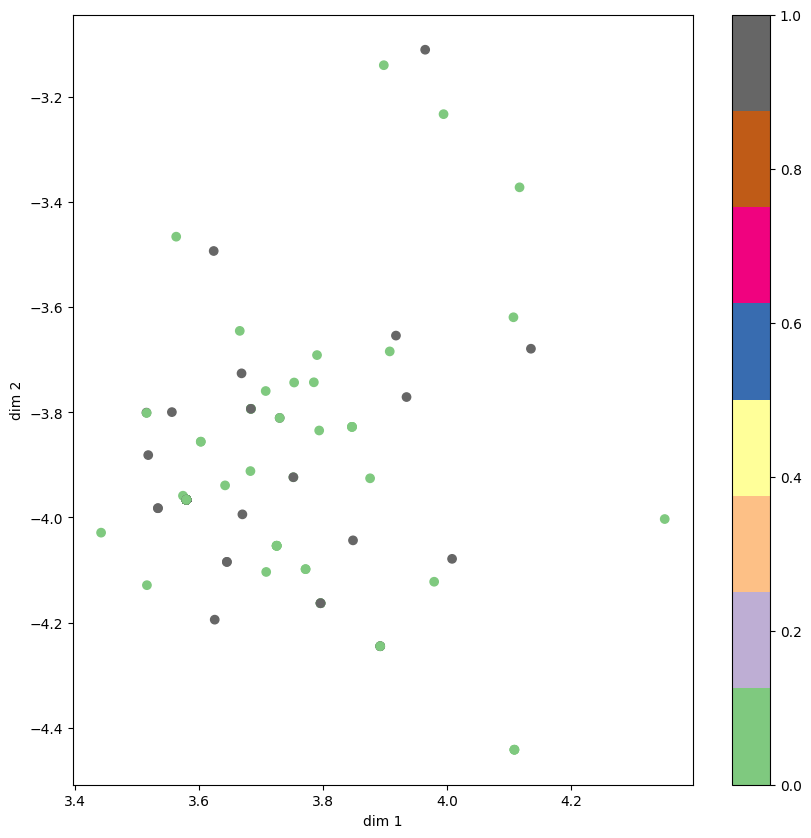

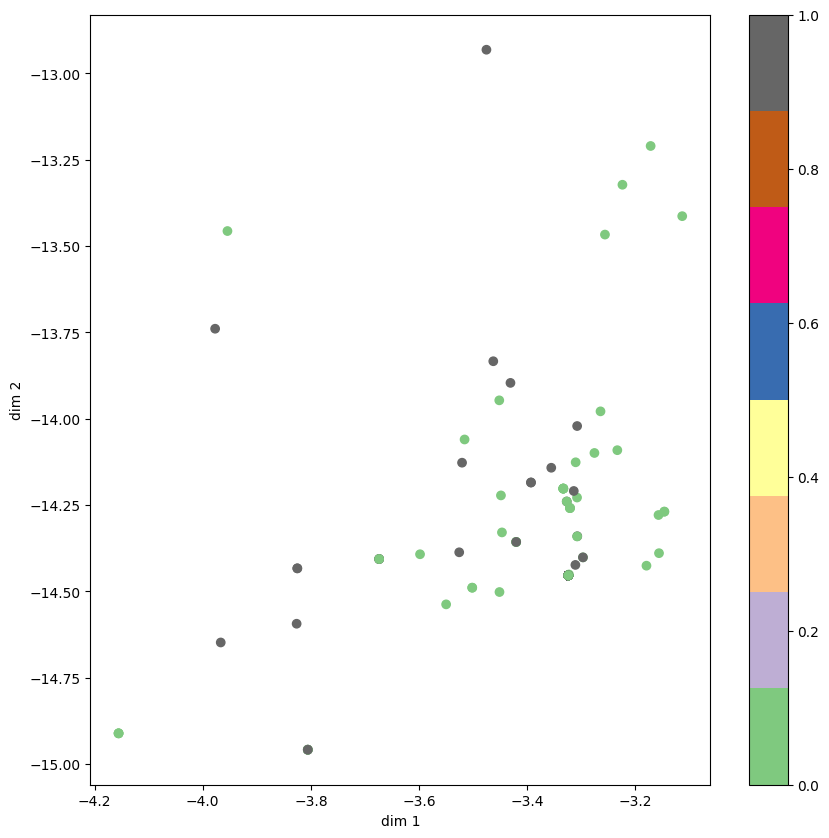

In [415]:
mu, var, _ = encoder.predict(x_train)
#Plot dim1 and dim2 for mu
plt.figure(figsize=(10, 10))
plt.scatter(mu[:, 0], mu[:, 1], c = y_train, cmap='Accent')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.colorbar()
plt.show()
plt.figure(figsize=(10, 10))
plt.scatter(var[:, 0], var[:, 1], c = y_train, cmap='Accent')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.colorbar()
plt.show()

In [71]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /gpfs/home/anair27/anaconda/akira_conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: keras-rl2


In [118]:
input_dim = 19962
latent_dim = 2

In [119]:
# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(input_dim,))
x = tf.keras.layers.Dense(512, activation='relu')(encoder_inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
z_mean = tf.keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = tf.keras.layers.Dense(latent_dim, name='z_log_var')(x)


In [120]:
# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [121]:
# Use the sampling function to sample from the latent distribution
z = tf.keras.layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

In [122]:
# Decoder
latent_inputs = tf.keras.layers.Input(shape=(latent_dim,), name='z_sampling')
x = tf.keras.layers.Dense(256, activation='relu')(latent_inputs)
x = tf.keras.layers.Dense(512, activation='relu')(x)
decoder_outputs = tf.keras.layers.Dense(input_dim, activation='sigmoid')(x)

In [123]:
# Instantiate the encoder
encoder = tf.keras.models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 19962)]      0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          10221056    ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 256)          131328      ['dense[0][0]']                  
                                                                                                  
 z_mean (Dense)                 (None, 2)            514         ['dense_1[0][0]']                
                                                                                            

In [124]:
# Instantiate the decoder
decoder = tf.keras.models.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 256)               768       
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 19962)             10240506  
                                                                 
Total params: 10,372,858
Trainable params: 10,372,858
Non-trainable params: 0
_________________________________________________________________


In [125]:
# VAE as a whole
outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.models.Model(encoder_inputs, outputs, name='vae')

In [126]:
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19962)]           0         
                                                                 
 encoder (Functional)        [(None, 2),               10353412  
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 19962)             10372858  
                                                                 
Total params: 20,726,270
Trainable params: 20,726,270
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Loss function
reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, outputs)
reconstruction_loss *= input_shape
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss)
kl_loss *= -0.5
vae_loss = reconstruction_loss + kl_loss

# Compile the model
vae.compile(optimizer='adam', loss=vae_loss)

RecursionError: maximum recursion depth exceeded while getting the repr of an object

In [80]:
vae.fit(train_dataset, epochs= 10)

Epoch 1/10


ValueError: in user code:

    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/losses.py", line 2654, in get
        raise ValueError(

    ValueError: Could not interpret loss function identifier: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.reduce_mean_8/Mean:0', description="created by layer 'tf.math.reduce_mean_8'")


In [133]:
# Define the loss function
def vae_loss(inputs, outputs, mean, logvar):
    reconstruction_loss = tf.reduce_mean(
        tf.square(inputs - outputs)
    )
    kl_divergence = -0.5 * tf.reduce_mean(
        1 + logvar - tf.square(mean) - tf.exp(logvar)
    )
    return reconstruction_loss + kl_divergence

In [134]:
# Compile the model
vae.compile(optimizer='adam', loss= vae_loss)

In [135]:
vae.fit(train_df, train_df, epochs=10, eag)

ValueError: Calling `Model.fit` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.fit` with eager mode enabled.

In [114]:
import tensorflow as tf
import numpy as np

# Load your training data into a numpy array
data = train_df.to_numpy()

# Define the encoder network
encoder_inputs = tf.keras.layers.Input(shape=(data.shape[1],))
encoder = tf.keras.layers.Dense(512, activation='relu')(encoder_inputs)
encoder = tf.keras.layers.Dense(256, activation='relu')(encoder)
mu = tf.keras.layers.Dense(4, activation='linear')(encoder)
log_var = tf.keras.layers.Dense(4, activation='linear')(encoder)

# Define the reparameterization trick
def reparameterization(mu, log_var):
    epsilon = tf.random.normal(shape=tf.shape(mu))
    std = tf.exp(0.5 * log_var)
    z = mu + epsilon * std
    return z

z = reparameterization(mu, log_var)

# Define the decoder network
decoder_inputs = tf.keras.layers.Input(shape=(4,))
decoder = tf.keras.layers.Dense(256, activation='relu')(decoder_inputs)
decoder = tf.keras.layers.Dense(512, activation='relu')(decoder)
reconstructed = tf.keras.layers.Dense(data.shape[1], activation='sigmoid')(decoder)

# Define the VAE as a Model with two inputs and two outputs
encoder_model = tf.keras.Model(encoder_inputs, [mu, log_var, z], name='encoder')
decoder_model = tf.keras.Model(decoder_inputs, reconstructed, name='decoder')
vae_model = tf.keras.Model(encoder_inputs, decoder_model(encoder_model(encoder_inputs)[2]), name='vae')

# Define the loss function
def vae_loss(x, reconstructed):
    reconstruction_loss = tf.reduce_mean(tf.square(x - reconstructed))
    kl_divergence = -0.5 * tf.reduce_mean(tf.exp(log_var) + mu**2 - 1. - log_var)
    return reconstruction_loss + kl_divergence

# Compile the model with the Adam optimizer and the defined loss function
vae_model.compile(optimizer='adam', loss=vae_loss)

# Train the model on the training data
vae_model.fit(data, data, epochs=10, batch_size=32)


Epoch 1/10


TypeError: in user code:

    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 317, in __call__
        self._total_loss_mean.update_state(
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 486, in update_state  **
        sample_weight = tf.__internal__.ops.broadcast_weights(
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/keras_tensor.py", line 283, in __array__
        raise TypeError(

    TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='Placeholder:0', description="created by layer 'tf.cast_3'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.


In [53]:
train_df, test_df = train_test_split(transcriptomic_df.iloc[:,2:].dropna(), test_size=0.2, random_state=42)

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values)).batch(1)

In [55]:
train_dataset

<BatchDataset element_spec=TensorSpec(shape=(None, 19962), dtype=tf.float64, name=None)>

In [56]:
vae.fit(train_dataset, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 995, in train_step
        self._validate_target_and_loss(y, loss)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 949, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=<function vae_loss at 0x7fd6e7c65510>, and therefore expects target data to be provided in `fit()`.


In [90]:
import tensorflow as tf

class NonConditionalVAE(tf.keras.Model):
    def __init__(self, latent_dim):
        super(NonConditionalVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(19962,)),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(19962),
        ])

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * 0.5) + mean

    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

    def call(self, inputs):
        mean, logvar = self.encode(inputs)
        z = self.reparameterize(mean, logvar)
        return self.decode(z), mean, logvar

# Define the loss function
def vae_loss(inputs, outputs, mean, logvar):
    reconstruction_loss = tf.reduce_mean(
        tf.square(inputs - outputs)
    )
    kl_divergence = -0.5 * tf.reduce_mean(
        1 + logvar - tf.square(mean) - tf.exp(logvar)
    )
    return reconstruction_loss + kl_divergence

# Create the VAE model
latent_dim = 4
vae = NonConditionalVAE(latent_dim)

# Compile the model with the Adam optimizer and the vae_loss function
vae.compile(optimizer='adam', loss=vae_loss)

In [91]:
train_df.shape

(412, 19962)

In [92]:
vae.fit(train_df, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/users/anair27/anaconda/akira_conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_file26ocj9v_.py", line 11, in tf__call
        z = ag__.converted_call(ag__.ld(self).reparameterize, (ag__.ld(mean), ag__.ld(logvar)), None, fscope)
    File "/tmp/__autograph_generated_fileb6cx137s.py", line 10, in tf__reparameterize
        eps = ag__.converted_call(ag__.ld(tf).random.normal, (), dict(shape=ag__.ld(mean).shape), fscope)

    ValueError: Exception encountered when calling layer "non_conditional_vae_2" "                 f"(type NonConditionalVAE).
    
    in user code:
    
        File "/tmp/ipykernel_230341/1505603619.py", line 37, in call  *
            z = self.reparameterize(mean, logvar)
        File "/tmp/ipykernel_230341/1505603619.py", line 25, in reparameterize  *
            eps = tf.random.normal(shape=mean.shape)
    
        ValueError: Cannot convert a partially known TensorShape (None, 4) to a Tensor.
    
    
    Call arguments received by layer "non_conditional_vae_2" "                 f"(type NonConditionalVAE):
      • inputs=tf.Tensor(shape=(None, 19962), dtype=float32)


In [ ]:
import tensorflow as tf

# Encoder
encoder_inputs = tf.keras.layers.Input(shape=(input_shape,))
x = tf.keras.layers.Dense(512, activation='relu')(encoder_inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
z_mean = tf.keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = tf.keras.layers.Dense(latent_dim, name='z_log_var')(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Use the sampling function to sample from the latent distribution
z = tf.keras.layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Instantiate the encoder
encoder = tf.keras.models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Decoder
latent_inputs = tf.keras.layers.Input(shape=(latent_dim,), name='z_sampling')
x = tf.keras.layers.Dense(256, activation='relu')(latent_inputs)
x = tf.keras.layers.Dense(512, activation='relu')(x)
decoder_outputs = tf.keras.layers.Dense(input_shape, activation='sigmoid')(x)

# Instantiate the decoder
decoder = tf.keras.models.Model(latent_inputs, decoder_outputs, name='decoder')
decoder.summary()

# VAE as a whole
outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.models.Model(encoder_inputs, outputs, name='vae')

# Loss function
reconstruction_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, outputs)
reconstruction_loss *= input_shape
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

# Compile the model
vae.compile(optimizer='


In [5]:
class VAE_Encoder(layers.Layer):
    def __init__(self, hidden_dim, latent_dim):
        super(VAE_Encoder, self).__init__()
        self.hidden_layer = layers.Dense(hidden_dim, activation='relu')
        self.mean_layer = layers.Dense(latent_dim)
        self.log_var_layer = layers.Dense(latent_dim)
    
    def call(self, inputs):
        hidden = self.hidden_layer(inputs)
        mean = self.mean_layer(hidden)
        log_var = self.log_var_layer(hidden)
#         print("mean", mean)
#         print("log var", log_var)
        return mean, log_var

class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * log_var) * epsilon

class VAE_Decoder(layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(VAE_Decoder, self).__init__()
        self.hidden_layer = layers.Dense(hidden_dim, activation='relu')
        self.output_layer = layers.Dense(original_dim, activation='sigmoid')
    
    def call(self, inputs):
        hidden = self.hidden_layer(inputs)
        return self.output_layer(hidden)

class VariationalAutoEncoder(tf.keras.Model):
    def __init__(self, original_dim, hidden_dim, latent_dim):
        super(VariationalAutoEncoder, self).__init__()
        self.encoder = VAE_Encoder(hidden_dim, latent_dim)
        self.sampling = Sampling()
        self.decoder = VAE_Decoder(hidden_dim, original_dim)
    
    def call(self, inputs):
        mean, log_var = self.encoder(inputs)
        z = self.sampling((mean, log_var))
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_mean(log_var - tf.square(mean) - tf.exp(log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed





In [6]:
train_df, test_df = train_test_split(transcriptomic_df, test_size=0.2, random_state=42)

In [7]:
train_df = train_df.iloc[:,2:]
train_df = train_df.dropna()

In [8]:
train_df.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
320,15.2734,26.3479,50.5069,2.7530,4.1399,1.0211,2.1526,16.4306,3.4428,34.8372,...,0.0,0.0,0.0000,0.5466,0.0413,0.0,0.0,0.0,0.0094,0.5005
329,14.1403,0.0000,19.6750,3.5325,1.2262,9.0446,6.4978,13.7731,1.5573,15.6642,...,0.0,0.0,0.0000,0.1469,0.0000,0.0,0.0,0.0,0.0317,0.1037
173,3.8841,0.0000,20.7853,1.8166,0.4261,38.9388,4.9413,17.9240,2.2736,5.3900,...,0.0,0.0,0.0000,0.3193,0.0000,0.0,0.0,0.0,0.0225,0.1128
272,51.7375,0.2065,42.9466,3.2630,2.2026,6.6859,10.3127,23.5359,8.0853,16.5925,...,0.0,0.0,0.0039,0.2106,0.0210,0.0,0.0,0.0,0.0063,0.2721
495,7.5015,0.0000,26.8785,3.7090,0.7660,5.2062,4.7513,9.6333,3.7937,13.0479,...,0.0,0.0,0.0000,0.3155,0.0000,0.0,0.0,0.0,0.0299,0.1715


In [9]:
X_train = train_df.values

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train)).batch(1)

2023-02-04 14:47:53.841782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-02-04 14:47:53.841844: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-04 14:47:53.841867: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (node1119.oscar.ccv.brown.edu): /proc/driver/nvidia/version does not exist
2023-02-04 14:47:53.842545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [178]:
original_dim = X_train.shape[1]
hidden_dim = 1024
latent_dim = 2

vae = VariationalAutoEncoder(original_dim, hidden_dim, latent_dim)

# Define the optimizer and loss function
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

In [179]:
for epoch in range(10):
    for X in train_dataset:
        with tf.GradientTape() as tape:
            reconstructed = vae(X)
            loss = loss_fn(X, reconstructed)
#             print(f"Reconstruction loss {loss}")
            loss += sum(vae.losses)  # Add the KL divergence regularization loss
#             print(f"With KL {loss}")

            grads = tape.gradient(loss, vae.trainable_weights)
            optimizer.apply_gradients(zip(grads, vae.trainable_weights))

    # Print the average loss for this epoch
    print("Epoch {}: Loss = {}".format(epoch + 1, loss.numpy()))

Epoch 1: Loss = nan
Epoch 2: Loss = nan
Epoch 3: Loss = nan
Epoch 4: Loss = nan
Epoch 5: Loss = nan
Epoch 6: Loss = nan
Epoch 7: Loss = nan
Epoch 8: Loss = nan
Epoch 9: Loss = nan
Epoch 10: Loss = nan


In [164]:
vae.encoder.get_weights()

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32),
 array([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], dtype=float32),
 array([nan, nan], dtype=float32),
 array([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], dtype=float32),
 array([nan, nan], dtype=float32)]

In [162]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [57]:
model = CVAE(latent_dim=10, input_dim=19964)

In [7]:
tf.random.normal(shape=(1, 2))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.81158537, -0.7471892 ]], dtype=float32)>

In [38]:
tf.random.stateless_binomial(shape=(1,1), seed = [10, 1], counts = [5], probs = [0.4])

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[3]], dtype=int32)>

In [ ]:
tf.random.